# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import  classification_report, confusion_matrix, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

# Loading dataset

In [2]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [3]:
X_train, y_train =  train.drop(["Depression"], axis=1), train["Depression"]
X_test, y_test =  test.drop(["Depression"], axis=1), test["Depression"]

# Preprocessing

In [4]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training

In [5]:
ann = MLPClassifier()

In [6]:
param_grid = {
    'hidden_layer_sizes': [(10,), (15,), (15, 10), (20, 10)],  # Simpler architectures
    'activation': ['relu', 'tanh'],                           # Effective activations
    'solver': ['adam', 'sgd'],                                       # Adam is efficient for most cases
    'alpha': [0.0001, 0.001, 0.01],                           # Regularization parameters
    'learning_rate': ['constant', 'adaptive'],                # Learning rate strategies
    'learning_rate_init': [0.001, 0.01]                       # Initial learning rates
}

In [7]:
grid_search = RandomizedSearchCV(estimator=ann, param_distributions=param_grid,  scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

In [8]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(10,), (15,),
                                                               (15, 10),
                                                               (20, 10)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'learning_rate_init': [0.001, 0.01],
                                        'solver': ['adam', 'sgd']},
                   scoring='accuracy', verbose=2)

# Model Evaluation

In [9]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_}")

Best Parameters: {'solver': 'sgd', 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (20, 10), 'alpha': 0.001, 'activation': 'relu'}
Best Cross-Validated Accuracy: 0.848423392513193


In [10]:
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81      2320
           1       0.85      0.89      0.87      3247

    accuracy                           0.84      5567
   macro avg       0.84      0.84      0.84      5567
weighted avg       0.84      0.84      0.84      5567



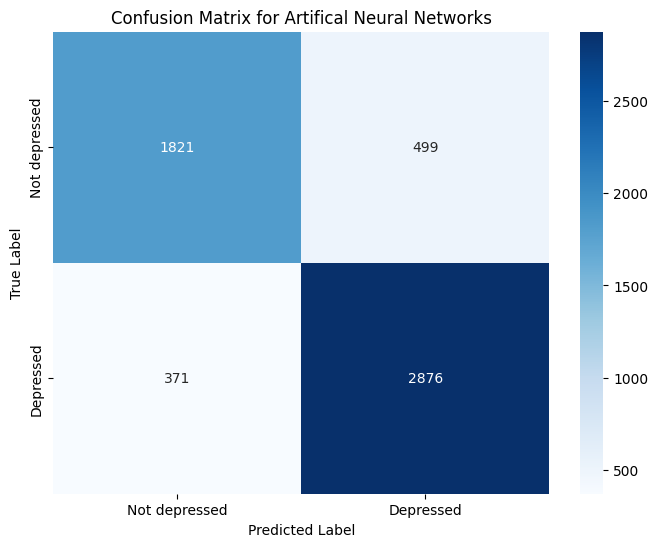

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not depressed", "Depressed"],
            yticklabels=["Not depressed", "Depressed"])
plt.title("Confusion Matrix for Artifical Neural Networks")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# AUROC Curve

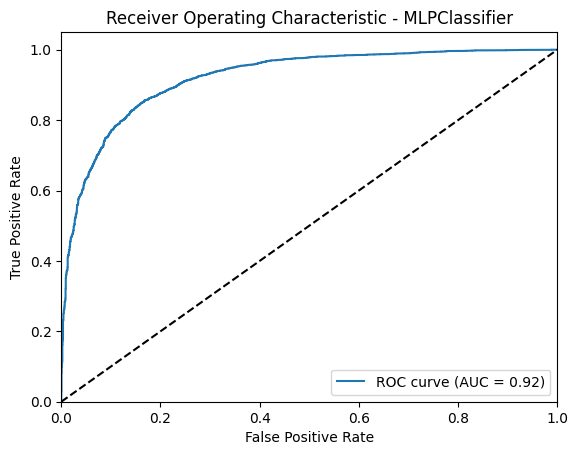

In [12]:
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - MLPClassifier')
plt.legend(loc="lower right")
plt.show()

# Feature importance

In [13]:
perm_importance = permutation_importance(best_model, X_test, y_test, scoring='accuracy')

# Display feature importance
for f, i in sorted(zip(train.columns[:-1], perm_importance.importances_mean), key=lambda x: x[1], reverse=True):
    print(f"Feature {f}: {i:.4f}")

Feature Have you ever had suicidal thoughts ?: 0.1011
Feature Academic Pressure: 0.0825
Feature Financial Stress: 0.0315
Feature Age: 0.0077
Feature Work/Study Hours: 0.0075
Feature Dietary Habits: 0.0068
Feature Study Satisfaction: 0.0028
Feature Family History of Mental Illness: 0.0007
Feature Gender: 0.0006
Feature City: 0.0003
Feature CGPA: 0.0000
Feature Degree: -0.0003
Feature Sleep Duration: -0.0010
